Submission 1 Kelas Belajar Pengembangan Machine Learning <br>
<b>Membuat Model NLP dengan TensorFlow</b> <br>
menggunakan dataset dari https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp <br>
<hr>
No. Registrasi: 0182180030-11 <br>
Nama: Dian Kurnia Imanda <br>
Email: diankurniaimanda@gmail.com

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [2]:
import pandas as pd
df_train = pd.read_csv('train.txt', names=['sentence', 'emotion'], sep=';')
#df_val = pd.read_csv('val.txt', names=['sentence', 'emotion'], sep=';')
#df_test = pd.read_csv('test.txt', names=['sentence', 'emotion'], sep=';')
df_train

,sentence,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  16000 non-null  object
 1   emotion   16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [4]:
category = pd.get_dummies(df_train.emotion)
df_new = pd.concat([df_train, category], axis=1)
df_new = df_new.drop(columns='emotion')
df_new

,sentence,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
15996,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
15997,i feel strong and good overall,0,0,1,0,0,0
15998,i feel like this was such a rude comment and i...,1,0,0,0,0,0


In [5]:
# ubah nilai-nilai dari dataframe ke dalam tipe data numpy array
sentence = df_new['sentence'].values
label = df_new[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

In [6]:
# bagi data training dan testing
from sklearn.model_selection import train_test_split
sentence_train, sentence_test, label_train, label_test = train_test_split(sentence, label, test_size=0.2, random_state=1)

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 5000 huruf yang paling sering muncul akan ditokenisasi dari seluruh kata pada dataset. 
tokenizer = Tokenizer(num_words=5000, oov_token='-')

# tokenisasi
tokenizer.fit_on_texts(sentence_train) 
tokenizer.fit_on_texts(sentence_test)

# ubah kalimat jd nilai 
sequence_train = tokenizer.texts_to_sequences(sentence_train)
sequence_test = tokenizer.texts_to_sequences(sentence_test)

print(tokenizer.word_index)

# padding 
padded_train = pad_sequences(sequence_train) 
padded_test = pad_sequences(sequence_test)

print(padded_train)

{'-': 1, 'i': 2, 'feel': 3, 'and': 4, 'to': 5, 'the': 6, 'a': 7, 'that': 8, 'feeling': 9, 'of': 10, 'my': 11, 'in': 12, 'it': 13, 'like': 14, 'so': 15, 'for': 16, 'im': 17, 'me': 18, 'but': 19, 'was': 20, 'have': 21, 'is': 22, 'this': 23, 'am': 24, 'with': 25, 'not': 26, 'about': 27, 'be': 28, 'as': 29, 'on': 30, 'you': 31, 'just': 32, 'at': 33, 'when': 34, 'or': 35, 'all': 36, 'because': 37, 'more': 38, 'do': 39, 'can': 40, 'really': 41, 'up': 42, 't': 43, 'are': 44, 'by': 45, 'very': 46, 'been': 47, 'know': 48, 'if': 49, 'out': 50, 'myself': 51, 'time': 52, 'how': 53, 'what': 54, 'get': 55, 'little': 56, 'had': 57, 'now': 58, 'will': 59, 'from': 60, 'being': 61, 'they': 62, 'people': 63, 'them': 64, 'would': 65, 'he': 66, 'want': 67, 'her': 68, 'some': 69, 'think': 70, 'one': 71, 'still': 72, 'ive': 73, 'him': 74, 'even': 75, 'an': 76, 'who': 77, 'life': 78, 'its': 79, 'make': 80, 'there': 81, 'we': 82, 'bit': 83, 'something': 84, 'love': 85, 'much': 86, 'going': 87, 'dont': 88, 'thi

In [8]:
# arsitektur model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.GlobalAveragePooling1D(), # unit=6 di output layer error
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [9]:
class TestCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
            print('\nAkurasi mencapai 90%')
            self.model.stop_training=True
callbacks = TestCallback()

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# latih model
history = model.fit(
      padded_train, label_train,
      #steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=50,
      validation_data=(padded_test, label_test), # menampilkan akurasi pengujian data validasi
      #validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      batch_size=64,
      callbacks= [callbacks])

Epoch 1/50
200/200 - 27s - loss: 1.4913 - accuracy: 0.3442 - val_loss: 1.2507 - val_accuracy: 0.4169
Epoch 2/50
200/200 - 25s - loss: 1.0360 - accuracy: 0.5347 - val_loss: 0.8353 - val_accuracy: 0.6934
Epoch 3/50
200/200 - 25s - loss: 0.6168 - accuracy: 0.7699 - val_loss: 0.6963 - val_accuracy: 0.7609
Epoch 4/50
200/200 - 25s - loss: 0.3636 - accuracy: 0.8730 - val_loss: 0.4837 - val_accuracy: 0.8525
Epoch 5/50
200/200 - 25s - loss: 0.2233 - accuracy: 0.9270 - val_loss: 0.4200 - val_accuracy: 0.8731
Epoch 6/50
200/200 - 25s - loss: 0.1579 - accuracy: 0.9485 - val_loss: 0.4028 - val_accuracy: 0.8863
Epoch 7/50
200/200 - 25s - loss: 0.1138 - accuracy: 0.9626 - val_loss: 0.4550 - val_accuracy: 0.8888
Epoch 8/50
200/200 - 25s - loss: 0.1101 - accuracy: 0.9657 - val_loss: 0.4425 - val_accuracy: 0.8784
Epoch 9/50
200/200 - 25s - loss: 0.0867 - accuracy: 0.9708 - val_loss: 0.4437 - val_accuracy: 0.8975
Epoch 10/50
200/200 - 25s - loss: 0.0881 - accuracy: 0.9726 - val_loss: 0.4227 - val_accura

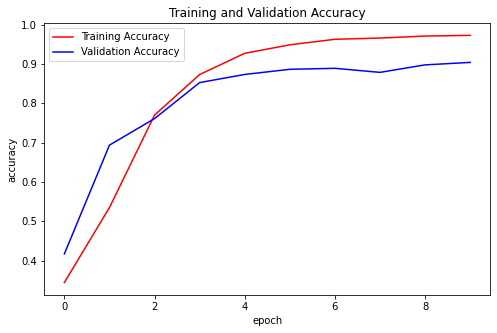

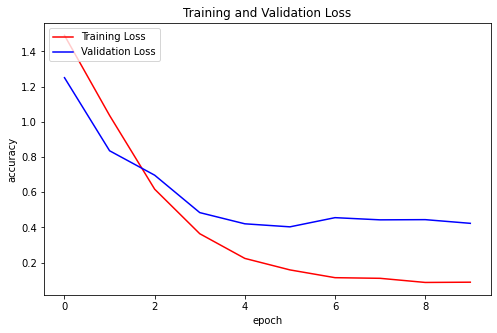

In [12]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(accuracy))

plt.figure(figsize=(8,5))
plt.plot(epochs_range, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, 'b', label='Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(8,5))
plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Loss')
plt.legend(loc='upper left')
plt.show()